In [1]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# EDA s využitím štatistickej analýzy

### Asumptions
- the data must be randomly sampled from the population of interest 
- the data variables follow a normal distribution
- a reasonably large sample size is used. 
- homogeneity of variance, i.e., the standard deviations of samples are approximately equal.

In [2]:
import matplotlib.pyplot as plt
import pylab as py
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats
from numpy.random import seed
from numpy.random import rand
from numpy.random import randn
from numpy import mean
from numpy import var
from math import sqrt

# 1. Normality Checks
**A large fraction of the field of statistics is concerned with data that assumes that it was drawn from a Gaussian distribution (also called normal distribution).**

## 1.1 Histogram

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

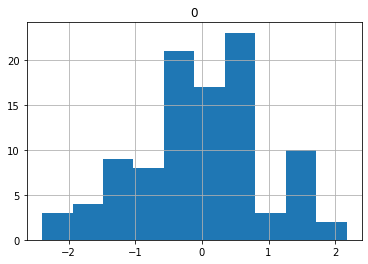

In [3]:
data_points = np.random.normal(0, 1, 100)

df = pd.DataFrame(data_points)
df.hist()

## 1.2 Distribution plot

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

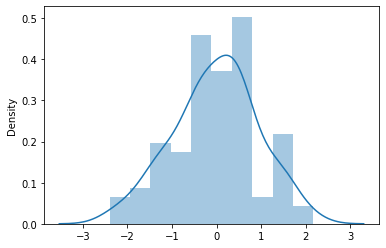

In [4]:
sns.distplot(df, bins=10)

## 1.3 Q-Q plot

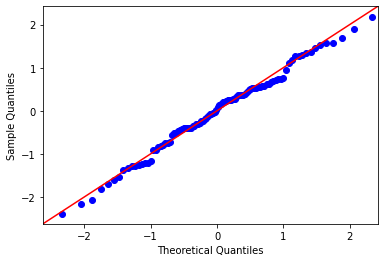

In [5]:
import statsmodels.api as sm

sm.qqplot(data_points, line='45')
py.show()

**Q-Q plot interpretation**
<img src="https://i.stack.imgur.com/ZXRkL.png" />
URL: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot

## 1.4 Shapiro-Wilk test of normality
**The Shapiro-Wilk test tests the null hypothesis $H_0$ that the data was drawn from a normal distribution. The chance of rejecting the null hypothesis $H_0$ when it is true is close to 5% regardless of sample size.**

URL https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

ShapiroResult(statistic=0.9841400980949402, pvalue=0.2748860716819763)
Normal distribution (fail to reject H0)


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


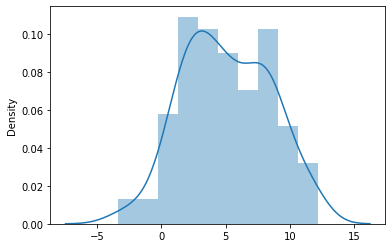

In [6]:
from scipy.stats import shapiro

np.random.seed(123)

x = stats.norm.rvs(loc=5, scale=3, size=100)
# x = stats.norm.rvs(loc=5, scale=3, size=1000)
sns.distplot(x, bins=10)

shapiro_test = shapiro(x)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

# 2. Statistical hypothesis testing

**Do normality checks before hypothesis testing**
- Histogram
- Distribution plot
- Q-Q plot
- Shapiro-Wilkov Test

## 2.1 Levene test - Variance test

**Hypothesis**
- $H_0$: all input samples are from populations with equal variances 
- **Fail to Reject $H_0$**: Equal variances 
- **Reject $H_0$**: Another variances

URL https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

In [7]:
from scipy.stats import levene
a = [8.88, 9.12, 9.04, 8.98, 9.00, 9.08, 9.01, 8.85, 9.06, 8.99]
b = [8.88, 8.95, 9.29, 9.44, 9.15, 9.58, 8.36, 9.18, 8.67, 9.05]
c = [8.95, 9.12, 8.95, 8.85, 9.03, 8.84, 9.07, 8.98, 8.86, 8.98]

# calculate variances
[np.var(x, ddof=1) for x in [a, b, c]]

[0.007054444444444413, 0.13073888888888888, 0.008890000000000002]

In [8]:
levene_test = levene(a, b, c)
print(levene_test)

# interpret
alpha = 0.05
if levene_test.pvalue > alpha:
    print('Equal variances (fail to reject H0)')
else:
    print('Another variances (reject H0)')

LeveneResult(statistic=7.584952754501659, pvalue=0.002431505967249681)
Another variances (reject H0)


**The small p-value < 0.05 suggests that the populations do not have equal variances.**

## 2.2 Student’s T-test

## $t = \frac{\mu_1 - \mu_2}{s_p \sqrt{\frac{1}{n_1} - \frac{1}{n_2}}}$ 

## $s_p = \sqrt{\frac{(n_1 - 1) s^2_{X_1} + (n_2 - 1) s^2_{X_2}}{n_1 + n_2  - 2}}$

**Hypothesis**
- $H_0$: the means of two populations are equal 
- **Fail to Reject $H_0$**: No difference between the sample means 
- **Reject $H_0$**: Some difference between the sample means

URL https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

Statistics=0.471, p=0.638
Same distributions (fail to reject H0)


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


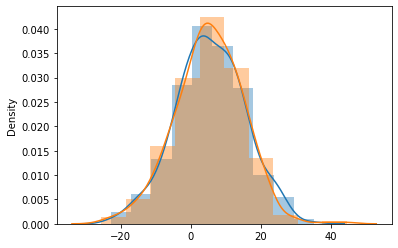

In [9]:
from scipy.stats import ttest_ind

seed(1)
# data1 = 5 * randn(100) + 50
# data2 = 5 * randn(100) + 51

data1 = stats.norm.rvs(loc=5, scale=10, size=500)
data2 = stats.norm.rvs(loc=5, scale=10, size=500)

sns.distplot(data1, bins=10)
sns.distplot(data2, bins=10)

# compare samples
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

## 2.3 Analysis of Variance (ANOVA)
The same purpose as the T-Test but for more data samples.

**Hypothesis**
- $H_0$ = the mean across two or more groups are equal 
- **Fail to Reject $H_0$**: All sample distributions are equal 
- **Reject $H_0$**: One or more sample distributions are not equal

URL https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

Statistics=3.655, p=0.027
Different distributions (reject H0)


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

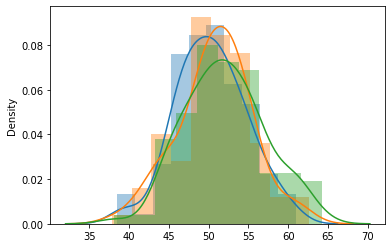

In [10]:
from scipy.stats import f_oneway

seed(1)
alpha = 0.05

data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
sns.distplot(data1, bins=10)
sns.distplot(data2, bins=10)
sns.distplot(data3, bins=10)

# compare samples
stat, p = f_oneway(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


## 2.4 Mann-Whitney U test

Similar to T-test, but non-parametric for at least 20 observations in each data sample.

**Hypothesis**
- $H_0$ = no difference between the distributions of the data samples 
- **Fail to Reject $H_0$**: Sample distributions are equal 
- **Reject $H_0$**: Sample distributions are not equal

URL https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

Statistics=4077.000, p=0.012
Different distribution (reject H0)


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


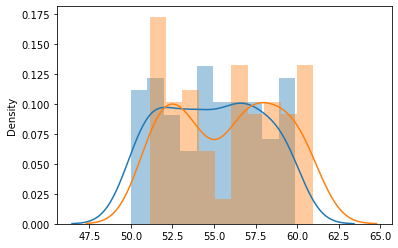

In [11]:
from scipy.stats import mannwhitneyu

seed(1)
data1 = 10 * rand(100) + 50
data2 = 10 * rand(100) + 51
sns.distplot(data1, bins=10)
sns.distplot(data2, bins=10)

# compare samples
stat, p = mannwhitneyu(data1, data2) 
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)') 
else:
    print('Different distribution (reject H0)')

## 2.5 Kruskal-Wallis H Test

The Kruskal-Wallis test is a nonparametric version of the one-way analysis of variance test or ANOVA for short. This test can be used to determine whether more than two independent samples have a different distribution. It can be thought of as the generalization of the Mann-Whitney U test.

**Hypothesis**
- $H_0$ = all data samples were drawn from the same distribution 
- **Fail to Reject $H_0$**: All sample distributions are equal 
- **Reject $H_0$**: One or more sample distributions are not equal.

URL https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

Statistics=6.051, p=0.049
Different distributions (reject H0)


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

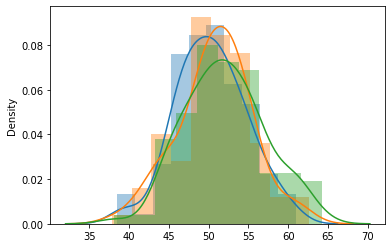

In [12]:
from scipy.stats import kruskal

seed(1)
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
sns.distplot(data1, bins=10)
sns.distplot(data2, bins=10)
sns.distplot(data3, bins=10)

# compare samples
stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

# 3. Statistical power analysis

## 3.1 Pearson's correlation between two samples

## $r_{xy} = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$

**Correlation**
- value in the range **<-1, 1>**
- **Positive** correlation: both variables change in the same direction.
- **Neutral** correlation: no relationship in the change of the variables. 
- **Negative** correlation: variables change in opposite directions.

URL https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Pearsons correlation: nan


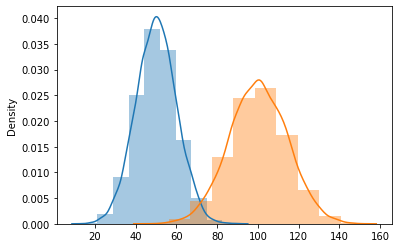

In [24]:
from scipy.stats import pearsonr

seed(1)
data1 = 10 * randn(10000) + 50
data2 = data1 + (10 * randn(10000) + 50)

# plotting
# plt.plot(data1)
# plt.plot(data2)
sns.distplot(data1, bins=10)
sns.distplot(data2, bins=10)

# calculate pearson's correlation
corr, _ = pearsonr(data1, data2) 
print('Pearsons correlation: %.3f' % corr)

## 3.2 Covariance

Covariance provides the a measure of strength of correlation between two variable or more set of variables. The covariance matrix element $C_{ij}$ is the covariance of $x_i$ and $x_j$. The element $C_{ii}$ is the variance of $x_i$.
- If $cov(x_i, x_j) = 0$ then variables are uncorrelated
- If $cov(x_i, x_j) > 0$ then variables positively correlated
- If $cov(x_i, x_j) < 0$ then variables negatively correlated

$ np.cov(a,b) =
    \begin{bmatrix} 
        cov(a,a) & cov(a,b) \\
        cov(a,b) & cov(b,b) \\
    \end{bmatrix}
\quad
$

URL https://numpy.org/doc/stable/reference/generated/numpy.cov.html

389.754561802618


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


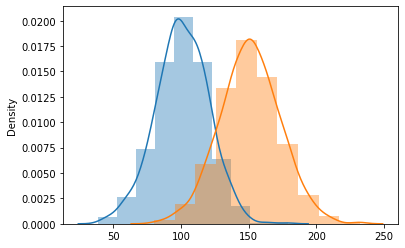

In [14]:
from numpy import cov

seed(1)
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

# plotting
sns.distplot(data1, bins=10)
sns.distplot(data2, bins=10)

# calculate covariance matrix
covariance = cov(data1, data2)[0, 1]
print(covariance)

## 3.3 Effect size by Cohen's d

## $d = \frac{\mu_1 - \mu_2}{s}$

using pooled standard deviation $s$ and variance $s^2$
## $s = \sqrt{\frac{(n_1 - 1) s^2_{X_1} + (n_2 - 1) s^2_{X_2}}{n_1 + n_2  - 2}}$

Cohen’s $d$ measures the difference between the mean from two Gaussian-distributed variables. 
Because the score is standardized, there is a table for the interpretation of the result, summarized as
- Small effect: d=0.20
- Medium effect: d=0.50 
- **Large effect: d=0.80**

Cohens d value: 0.336949
Small effect - Cohens d value: 0.336949


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


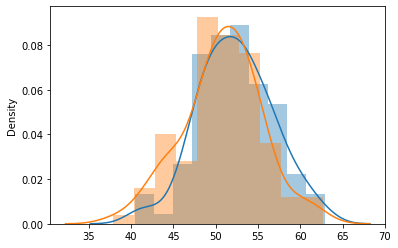

In [15]:
# calculate cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2) 
    
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)

    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
    
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    
    # calculate the effect size
    d = (u1 - u2) / s 
    return d

# generate two samples
seed(1)
data1 = 5 * randn(100) + 52
data2 = 5 * randn(100) + 50

# data1 = stats.norm.rvs(loc=5, scale=10, size=500)
# data2 = stats.norm.rvs(loc=5, scale=10, size=500)

# plt.plot(data1)
# plt.plot(data2)
sns.distplot(data1, bins=10)
sns.distplot(data2, bins=10)

cd = cohend(data1, data2)
print('Cohens d value: %f' % cd)

# interpret
if 0.2 <= cd < 0.5:
    print('Small effect - Cohens d value: %f' % cd)
elif 0.5 <= cd < 0.8:
    print('Medium effect - Cohens d value: %f' % cd)
elif 0.8 <= cd:
    print('Large effect - Cohens d value: %f' % cd)

## 3.4 Confidence interval

### if (n >= 30) then $\mu \pm z \frac{\sigma}{\sqrt{n}}$

### if (n < 30)  then $\mu \pm t \frac{\sigma}{\sqrt{n}}$

- Sample size $n$
- Mean $\mu$
- Standard deviation $\sigma$
- Degrees of Freedom in a sample $df=n-1$
- The z-value for 95% confidence is $Z=1.96$
- Z-table https://www.statisticshowto.com/tables/z-table/    
- t-table  https://www.statisticshowto.com/tables/t-distribution-table/

URL https://www.statsmodels.org/devel/generated/statsmodels.stats.weightstats.DescrStatsW.tconfint_mean.html

In [16]:
import statsmodels.stats.api as sms

print('data1: confidence interval', sms.DescrStatsW(data1).tconfint_mean())
print('data2: confidence interval', sms.DescrStatsW(data2).tconfint_mean())

data1: confidence interval (51.42031921509569, 53.1855093056613)
data2: confidence interval (49.83467576505632, 51.69327201114568)


# Combinated example of generated datasets

**Populations**

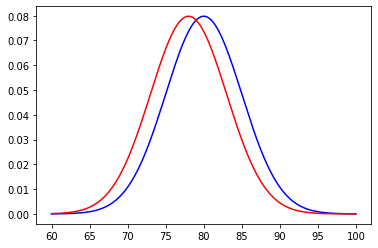

In [17]:
mean1 = 80
mean2 = 78
size = 5
data1 = stats.norm(mean1, size)
data2 = stats.norm(mean2, size)

start = 60
stop = 100
num = 1000
x = np.linspace(start, stop, num)
plt.plot(x, data1.pdf(x), 'b')
plt.plot(x, data2.pdf(x), 'r')

**Samples**

sample1 mean= 80.04910947381293
sample2 mean= 77.89818765416817


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

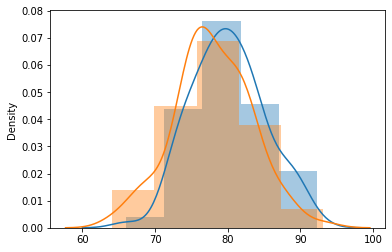

In [18]:
sample_size = 100
sample1 = data1.rvs(sample_size)
sample2 = data2.rvs(sample_size)
print('sample1 mean=', sample1.mean())
print('sample2 mean=', sample2.mean())
sns.distplot(sample1, bins=5)
sns.distplot(sample2, bins=5)

**Test of normality: if samples have nornal distribution**

In [19]:
print('Shapiro sample1:', stats.shapiro(sample1))
print('Shapiro sample2:', stats.shapiro(sample1))

Shapiro sample1: ShapiroResult(statistic=0.9902606010437012, pvalue=0.6856661438941956)
Shapiro sample2: ShapiroResult(statistic=0.9902606010437012, pvalue=0.6856661438941956)


**Test of variances: if samples are from populations with equal variances**

In [20]:
stats.levene(sample1, sample2)

LeveneResult(statistic=0.08445498066796327, pvalue=0.7716527095626913)

**Statistical power**

In [21]:
cd = cohend(sample1, sample2)
print('Cohens d value: %f' % cd)

Cohens d value: 0.413513


**Estimate optimal sample size based on the Cohen's d value**
- solve for any one parameter of the power of a two sample t-test
- for t-test the keywords are: effect_size, nobs1, alpha, power, ratio
- exactly one needs to be None, all others need numeric values

URL https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html

In [22]:
sm_stats.power.tt_ind_solve_power(cd, None, 0.05, 0.8, 1)

92.77339120031873

**Two-sided confidence interval for weighted mean of data**

In [23]:
print('sample1: confidence interval', sms.DescrStatsW(sample1).tconfint_mean())
print('sample2: confidence interval', sms.DescrStatsW(sample2).tconfint_mean())

sample1: confidence interval (79.04708070918655, 81.05113823843932)
sample2: confidence interval (76.83685616690738, 78.95951914142896)


**Experiment toward reality ;)**

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='observation', ylabel='score'>

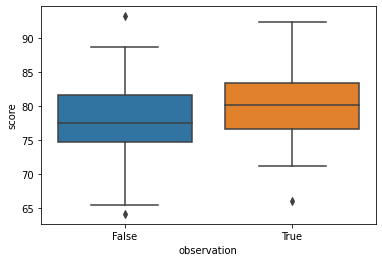

In [24]:
df = pd.DataFrame({'observation': np.repeat([True, False], sample_size), 
                   'score': np.concatenate((sample1, sample2))})
sns.boxplot('observation', 'score', data=df)